In [1]:
"""Imagine you are a market researcher working for an automobile company. Your company wants to understand the key factors that
contribute to customer satisfaction with their vehicles. To achieve this, you collect data from customers regarding their 
satisfaction levels with different aspects of the car, such as performance, comfort, safety, features, design, and fuel efficiency.

Now, you have a dataset with several variables that measure different aspects of customer satisfaction. However, it's challenging
to determine which factors are most influential in driving overall satisfaction. This is where factor analysis comes into play.

By applying factor analysis to the dataset, you can uncover the underlying factors or dimensions that explain the patterns of 
correlations among the variables. It helps you identify the key factors that contribute to overall customer satisfaction. 
For example, the analysis may reveal that performance, comfort, and safety are three primary factors driving customer 
satisfaction with the automobiles.
"""

"Imagine you are a market researcher working for an automobile company. Your company wants to understand the key factors that\ncontribute to customer satisfaction with their vehicles. To achieve this, you collect data from customers regarding their \nsatisfaction levels with different aspects of the car, such as performance, comfort, safety, features, design, and fuel efficiency.\n\nNow, you have a dataset with several variables that measure different aspects of customer satisfaction. However, it's challenging\nto determine which factors are most influential in driving overall satisfaction. This is where factor analysis comes into play.\n\nBy applying factor analysis to the dataset, you can uncover the underlying factors or dimensions that explain the patterns of \ncorrelations among the variables. It helps you identify the key factors that contribute to overall customer satisfaction. \nFor example, the analysis may reveal that performance, comfort, and safety are three primary factors

In [2]:
import pandas as pd 
import numpy as np
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"Airline_Passenger_Satisfaction.csv", index_col=0)
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
index,,,,,,,,,,,,,,,,,,,,,
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,25,18.0,3,...,3,5,5,4,3,4,4,5,5,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,1,6.0,3,...,3,1,1,1,5,3,1,4,1,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,0,0.0,2,...,5,5,5,4,3,4,4,4,5,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,11,9.0,2,...,2,2,2,2,5,3,1,4,2,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,0,0.0,3,...,5,5,3,3,4,4,3,3,3,satisfied


In [4]:
df.shape

(1014, 24)

In [5]:
x = df.iloc[:,9:23]
x

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
index,,,,,,,,,,,,,,
0,3,4,3,1,5,3,5,5,4,3,4,4,5,5
1,3,2,3,3,1,3,1,1,1,5,3,1,4,1
2,2,2,2,2,5,5,5,5,4,3,4,4,4,5
3,2,5,5,5,2,2,2,2,2,5,3,1,4,2
4,3,3,3,3,4,5,5,3,3,4,4,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,2,2,2,4,3,2,3,3,2,5,4,1,3,3
1010,4,0,4,3,2,4,2,2,5,3,4,2,1,2
1011,2,2,2,2,5,3,1,4,4,4,4,2,4,1


# Bartlett's test for adequecy 

In [6]:

# in case if p-value >= 0.05 then the factor analysis of the data will not be adequate
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_squre_value,p_value = calculate_bartlett_sphericity(x)


#Keep in mind that Bartlett's test for adequacy assumes that the variables are normally distributed and
# ---have linear relationships. If these assumptions are violated, the test results may not be reliable.

In [7]:
chi_squre_value,p_value
#p-value <0.05 indicates, the observed correlation matrix is not an identity matrix. The factor analysis is adequate for this data

#Chi-square Value:
# The chi-square value is calculated using Bartlett's test for sphericity. It tests the null hypothesis that the correlation
# ---matrix is an identity matrix, indicating no intercorrelations among the variables. A significant chi-square value suggests 
# that the variables are not independent and are suitable for factor analysis.

# the null hypothesis suggests that there is no relationship or association between the variables in the dataset. If the null 
# hypothesis holds true, it implies that the variables are unrelated and do not share any common underlying factors.

# In the context of Bartlett's test for adequacy, the null hypothesis assumes that the correlation matrix of the variables in 
#the dataset is an identity matrix, indicating that there are no intercorrelations among the variables.

#In simpler terms, the null hypothesis suggests that there is no relationship or association between the variables in the dataset.
#If the null hypothesis holds true, it implies that the variables are unrelated and do not share any common underlying factors.

(5977.586654207094, 0.0)

# Kaiser-Meyer-Olkin (KMO)

In [8]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(x)
kmo_model 
#KMO > 0.5 indicates that factor analysis is suitable for the data
#This test measures the suitability of data for factor analysis. The suitable KMO value should be greater than 0.5.

0.7700161579863486

In [9]:
fa = FactorAnalyzer()
fa.fit(x)

FactorAnalyzer(rotation_kwargs={})

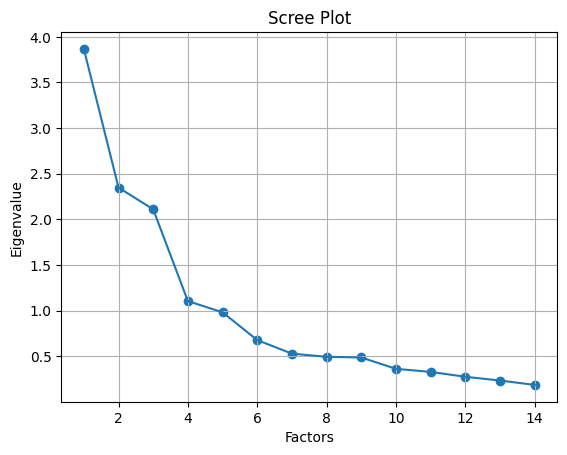

In [10]:
eigen_values,vectors = fa.get_eigenvalues()

# Scree plot of eigen values
plt.scatter(range(1,x.shape[1]+1),eigen_values)
plt.plot(range(1,x.shape[1]+1),eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()


# he scree plot is used to determine the number of factors or components to retain in the analysis. The eigenvalues represent the amount of variance 
#explained by each factor or component. A higher eigenvalue indicates that the corresponding factor or component explains more variance in the data.

In [11]:
# factor Analysis with 4 factors 

fa = FactorAnalyzer()
fa.set_params(n_factors=4, rotation='varimax')
fa.fit(x)
loadings = fa.loadings_
loadings

# 'varimax' is a popular rotation method that simplifies the interpretation of the factors by maximizing the variance of the squared loadings.'varimax' is a popular rotation method that simplifies the interpretation of the factors by maximizing the variance of the squared loadings.

array([[ 0.07556826,  0.13547545,  0.70302746,  0.34260381],
       [-0.00541175,  0.09371294,  0.08732738,  0.61674384],
       [-0.03524925,  0.01864215,  0.72145807,  0.56964007],
       [-0.00396763, -0.04060227,  0.11683473,  0.76424396],
       [ 0.75659854,  0.03439161,  0.06146037,  0.0158583 ],
       [ 0.34042972,  0.12685175,  0.62689923, -0.09714746],
       [ 0.76696069,  0.07289447,  0.15189492, -0.04666896],
       [ 0.73579354,  0.48939118,  0.08263303,  0.02570102],
       [ 0.10602888,  0.67880748,  0.04894043,  0.00668104],
       [ 0.04376001,  0.50205897,  0.15774795,  0.01812973],
       [ 0.01340629,  0.76313894, -0.00178991,  0.09701597],
       [ 0.10754336,  0.29383591,  0.02931572, -0.01487263],
       [ 0.05084816,  0.7868904 ,  0.00987452,  0.02977884],
       [ 0.87171129,  0.09146507,  0.05217805,  0.00881537]])

In [12]:
loadings.shape

(14, 4)

In [13]:
factor_df = pd.DataFrame(loadings,index = x.columns)
factor_df.columns = ['Factor1','Factor2','Factor3','Factor4']
factor_df

,Factor1,Factor2,Factor3,Factor4
Inflight wifi service,0.075568,0.135475,0.703027,0.342604
Departure/Arrival time convenient,-0.005412,0.093713,0.087327,0.616744
Ease of Online booking,-0.035249,0.018642,0.721458,0.569640
Gate location,-0.003968,-0.040602,0.116835,0.764244
Food and drink,0.756599,0.034392,0.061460,0.015858
Online boarding,0.340430,0.126852,0.626899,-0.097147
Seat comfort,0.766961,0.072894,0.151895,-0.046669
Inflight entertainment,0.735794,0.489391,0.082633,0.025701
On-board service,0.106029,0.678807,0.048940,0.006681
Leg room service,0.043760,0.502059,0.157748,0.018130


In [14]:
factor_df = factor_df.sort_values(by = ['Factor2'],ascending = False)
factor_df

,Factor1,Factor2,Factor3,Factor4
Inflight service,0.050848,0.786890,0.009875,0.029779
Baggage handling,0.013406,0.763139,-0.001790,0.097016
On-board service,0.106029,0.678807,0.048940,0.006681
Leg room service,0.043760,0.502059,0.157748,0.018130
Inflight entertainment,0.735794,0.489391,0.082633,0.025701
Checkin service,0.107543,0.293836,0.029316,-0.014873
Inflight wifi service,0.075568,0.135475,0.703027,0.342604
Online boarding,0.340430,0.126852,0.626899,-0.097147
Departure/Arrival time convenient,-0.005412,0.093713,0.087327,0.616744
Cleanliness,0.871711,0.091465,0.052178,0.008815


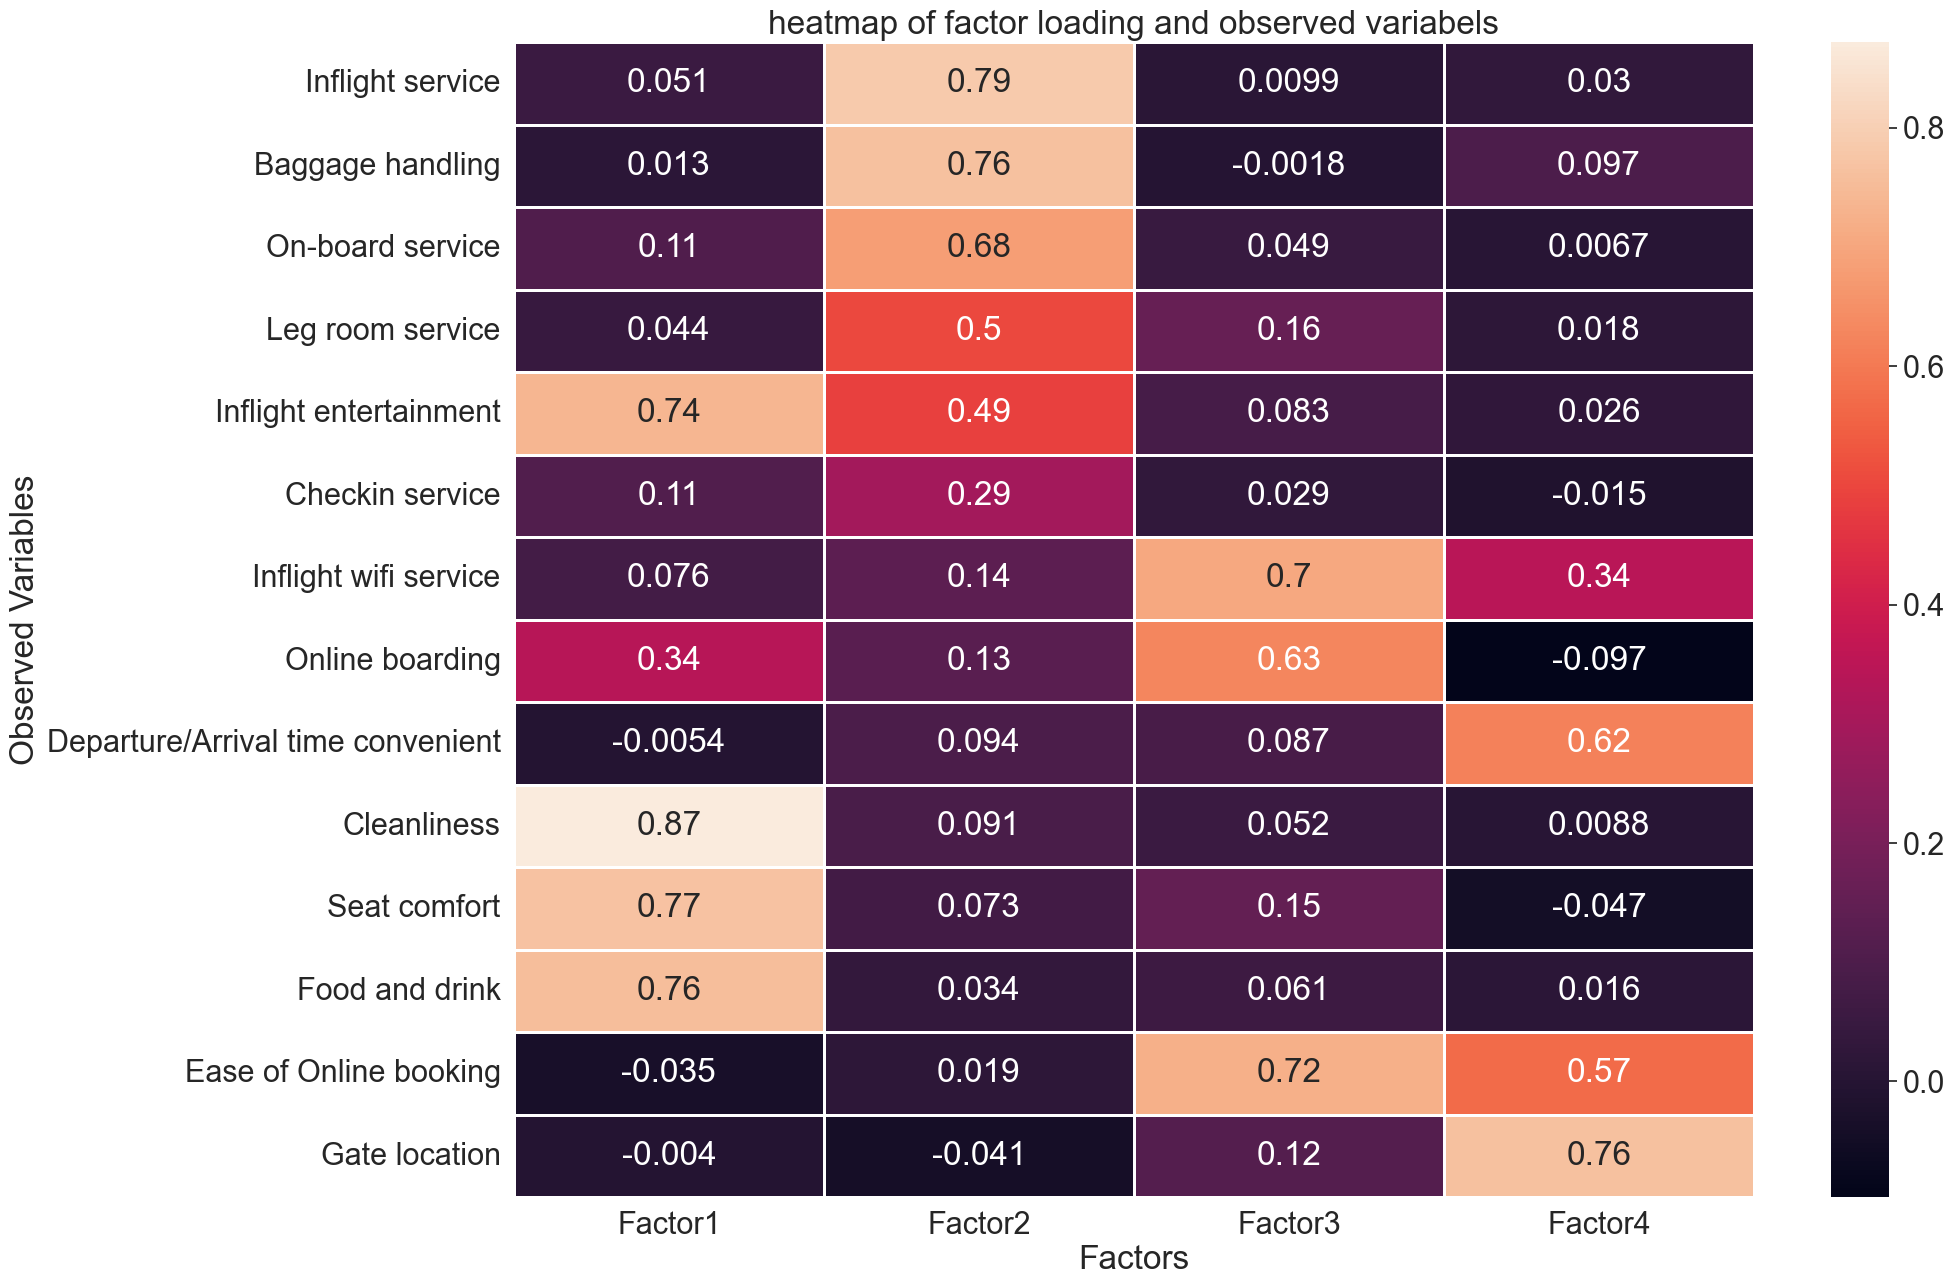

In [15]:
sns.set(font_scale = 2) # set font size
plt.subplots(figsize=(20,15)) # resize heatmap
sns.heatmap(data=factor_df,annot= True,linewidths = 1) # resize linewidths  
plt.title("heatmap of factor loading and observed variabels")
plt.xlabel("Factors")
plt.ylabel("Observed Variables")
plt.show()

In [16]:
# Factor 1
# ---Comfort of Sitting Inside the flight (Ambience): Cleanliness, Seat Comfort, Food & Drink, Inflight Entertainment
# Factor 2
# -- Staff Efficiency: Inflight Service, Baggage Handling, On-Board Service, Leg Room Service
# Factor 3 
# --- # **Complementary Services**: Ease of Online Booking, Inflight WiFi, Online Baording
#Factor 4
# -- Gate Location, Departure/Arrival time convenience
